# Lab 4 - Linear models

We focus on models in the form 

$$ y \sim \mathrm{Normal}(\alpha+X\beta,\sigma) $$



In [6]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Excercise 1 - modelling height of !Kung people

### Normal model - no predictors
We will try to fit $\mathrm{Normal}(\mu,\sigma)$ distribution to height data. Special case of linear model with $\beta=0$.

In [2]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


## Task 1. Prior predictive checks

In [10]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=1,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

20:58:11 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

20:58:11 - cmdstanpy - INFO - CmdStan done processing.


In [11]:
sim_df = sim.draws_pd()
sim_df

,chain__,iter__,draw__,lp__,accept_stat__,mu,sigma,height
0,1.0,1.0,1.0,0.0,0.0,150.225,14.4506,122.017
1,1.0,2.0,2.0,0.0,0.0,147.050,11.6303,168.435
2,1.0,3.0,3.0,0.0,0.0,140.816,14.4321,154.229
3,1.0,4.0,4.0,0.0,0.0,148.691,17.9113,135.869
4,1.0,5.0,5.0,0.0,0.0,167.228,13.9370,163.204
...,...,...,...,...,...,...,...,...
995,1.0,996.0,996.0,0.0,0.0,159.111,14.0486,152.324
996,1.0,997.0,997.0,0.0,0.0,158.595,16.1496,150.309
997,1.0,998.0,998.0,0.0,0.0,149.544,15.8589,142.144
998,1.0,999.0,999.0,0.0,0.0,150.835,13.6824,143.704




1. Plot histograms of mu, sigma and simulated height.
2. Plot a joint distribution of mu and sigma.
3. Check if samples are consistent with priors.
4. Correct prior parameters to make them reasonably spreaded out. 
5. Check if observed data is possible to obtain using priors.

<Axes: xlabel='height', ylabel='Density'>

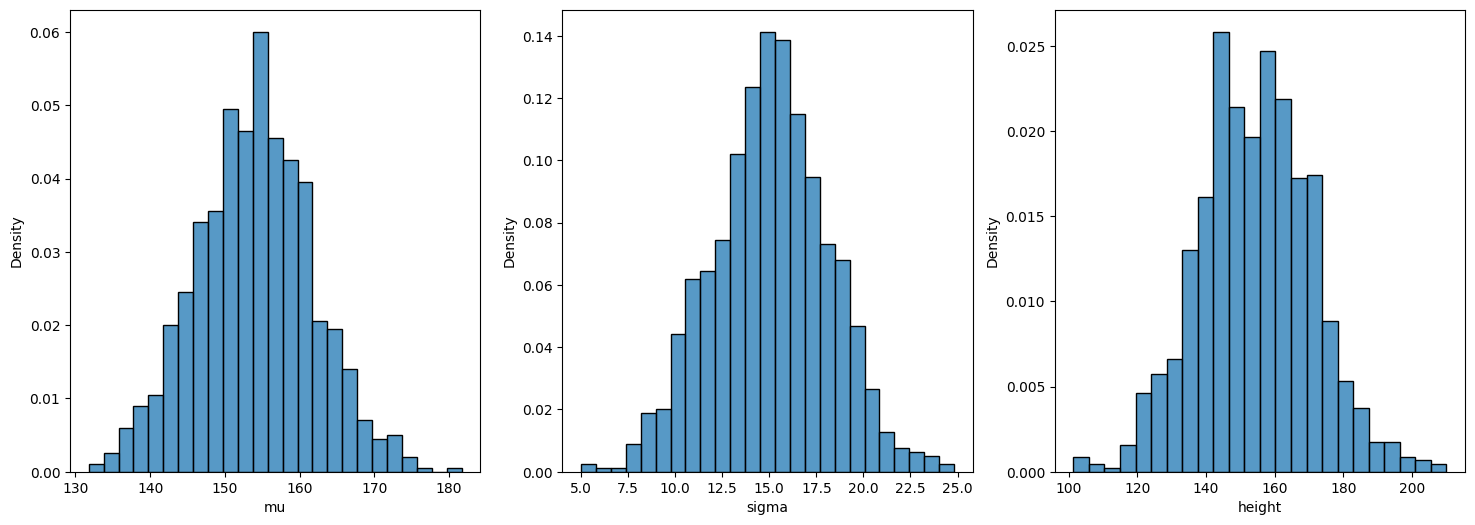

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))
sns.histplot(x="mu", data=sim_df, stat="density", ax=ax[0])
sns.histplot(x="sigma", data=sim_df, stat='density', ax=ax[1])
sns.histplot(x="height", data=sim_df, stat='density', ax=ax[2])

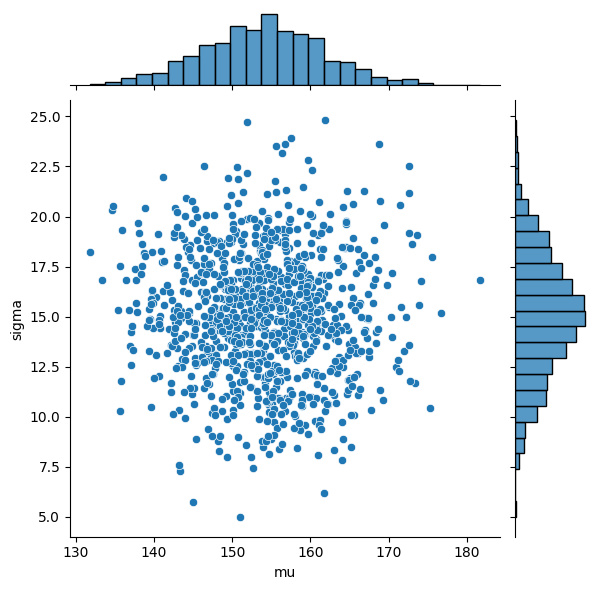

In [14]:
sns.jointplot(data=sim_df, x="mu", y="sigma")

## Task 2. Model fit and evaluation

In [24]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

21:06:12 - cmdstanpy - INFO - compiling stan file /workspace/height_1_fit.stan to exe file /workspace/height_1_fit
21:06:25 - cmdstanpy - INFO - compiled model executable: /workspace/height_1_fit


In [25]:
fit=model_1_fit.sample(data=dict(N=len(d),heights=d.height.values),
                         seed=28052020)

21:06:33 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

21:06:33 - cmdstanpy - INFO - CmdStan done processing.
21:06:33 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'height_1_fit.stan', line 15, column 4 to column 32)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'height_1_fit.stan', line 15, column 4 to column 32)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'height_1_fit.stan', line 15, column 4 to column 32)
Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'height_1_fit.stan', line 15, column 4 to column 32)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'height_1_fit.stan', line 15, column 4 to column 32)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'height_1_fit.stan', line 15, column 4 to column 32)
	Exception: normal_lpdf: Location parameter is inf, but must be finite! (in 'height_1_fit.stan', line 15, c


1. Plot a joint distribution of fitted mu and sigma.
2. Plot histograms of data and simulated heights and evaluate the quality of model.


In [28]:
df = fit.draws_pd()
df.head()

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigma,h_hat
0,1.0,1.0,1.0,-892.000,0.978942,0.724337,2.0,3.0,0.0,892.095,154.326,7.73742,166.558
1,1.0,2.0,2.0,-895.261,0.397623,0.724337,2.0,3.0,0.0,898.354,155.578,8.25504,162.328
2,1.0,3.0,3.0,-893.251,0.782185,0.724337,2.0,3.0,0.0,897.487,154.016,7.53787,156.282
3,1.0,4.0,4.0,-893.064,0.878915,0.724337,2.0,3.0,0.0,896.140,155.051,7.48265,155.295
4,1.0,5.0,5.0,-893.043,0.922574,0.724337,2.0,5.0,0.0,894.151,155.256,7.76132,147.751


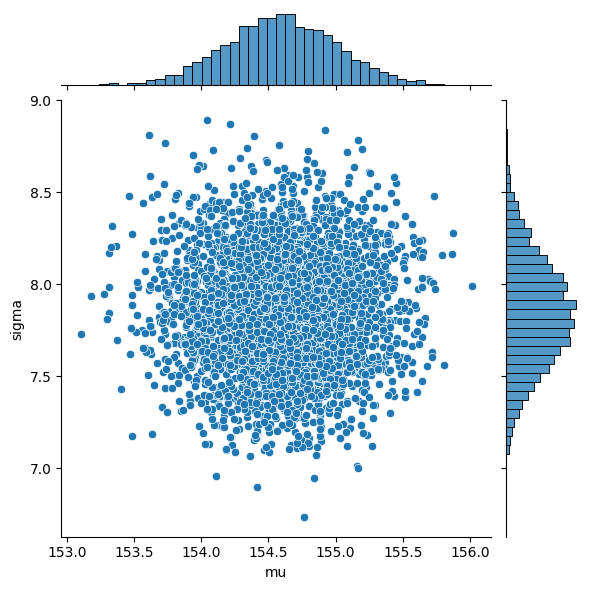

In [30]:
sns.jointplot(data=df, x='mu', y='sigma')


<Axes: xlabel='h_hat', ylabel='Density'>

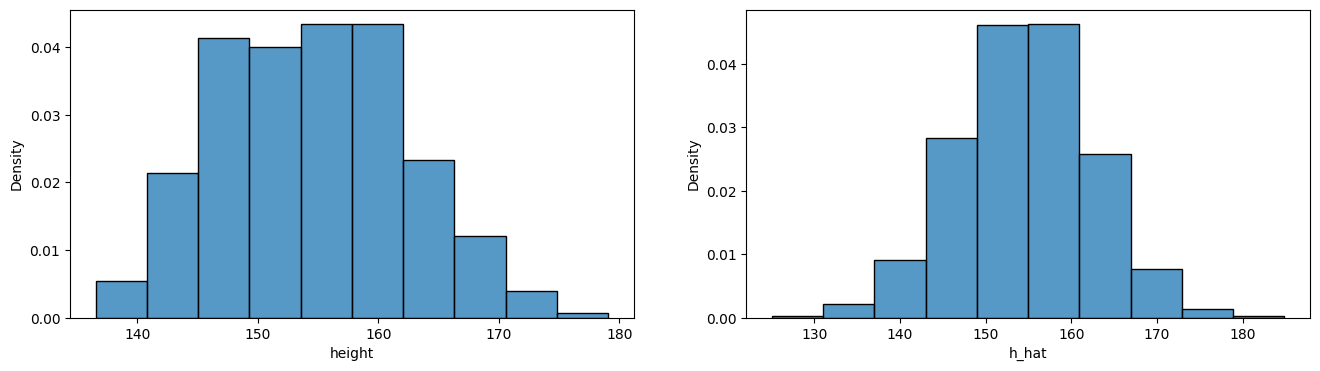

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(x="height", data=d, stat='density', ax=ax[0], bins=10)
sns.histplot(x="h_hat", data=df, stat='density', ax=ax[1], bins=10)

## Task 3. Adding predictor to the model - weight

Create column ```c_weight``` in the dataframe containing weights substrated by their mean.


In [32]:
d['c_weight'] = d['weight'] - d['weight'].mean()
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}


## Task 4. Prior predictive checks
 

In [42]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=1, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

21:13:10 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

21:13:10 - cmdstanpy - INFO - CmdStan done processing.


In [43]:
ppc_df = sim.draws_pd()
ppc_df.head()

,chain__,iter__,draw__,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,1.0,1.0,1.0,0.0,0.0,150.225,-0.183120,9.14377,144.521,142.384,...,141.979,135.663,150.327,160.766,133.311,160.341,143.189,146.141,143.431,135.275
1,1.0,2.0,2.0,0.0,0.0,163.473,0.868820,13.89430,136.687,176.297,...,157.622,182.974,182.434,178.154,172.677,178.469,166.847,149.200,188.074,193.034
2,1.0,3.0,3.0,0.0,0.0,144.879,0.246443,15.35150,110.210,124.159,...,143.310,174.816,161.890,128.552,140.750,149.760,131.411,152.252,192.838,127.660
3,1.0,4.0,4.0,0.0,0.0,154.671,0.721770,11.23120,148.391,142.867,...,161.151,156.030,149.709,145.839,151.285,175.074,162.588,159.611,165.027,172.059
4,1.0,5.0,5.0,0.0,0.0,145.095,1.741840,14.89130,134.750,139.268,...,139.692,157.893,166.934,197.000,189.684,164.396,183.512,173.216,182.673,188.284


Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

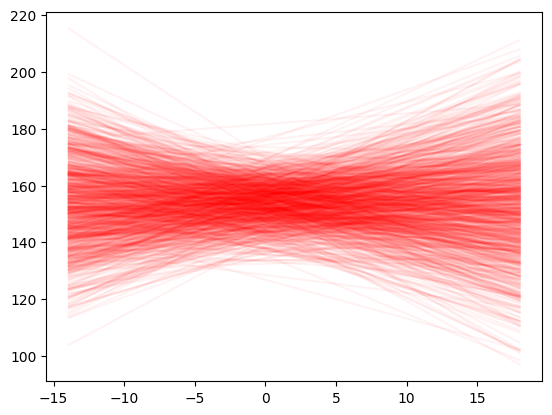

In [44]:
alpha = ppc_df['alpha'].values
beta = ppc_df['beta'].values
weight = np.linspace(d.c_weight.min(),d.c_weight.max(), R).reshape((R, 1))
h_hat = weight * beta + alpha
extended_domain = np.ones((1, R)) * weight
plt.plot(extended_domain, h_hat, 'r', alpha=0.05)
plt.show()

In [45]:
heights = ppc_df.drop(["lp__", "accept_stat__", "alpha", "beta", "sigma"], axis=1)
heights.mean().mean()


np.float64(164.17958935849057)

In [46]:
heights.values.std()


np.float64(91.49795559719938)

In [49]:
heights.max().max()


np.float64(1000.0)

## Task 5. Modifying prior

If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.


In [50]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

21:14:06 - cmdstanpy - INFO - compiling stan file /workspace/height_2b_ppc.stan to exe file /workspace/height_2b_ppc
21:14:14 - cmdstanpy - INFO - compiled model executable: /workspace/height_2b_ppc


In [51]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=1, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

21:14:15 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

21:14:15 - cmdstanpy - INFO - CmdStan done processing.


In [52]:
ppc_df = sim.draws_pd()
ppc_df.head()

,chain__,iter__,draw__,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,1.0,1.0,1.0,0.0,0.0,150.225,0.832669,9.14377,130.3810,128.9070,...,154.309,148.655,163.981,175.081,148.289,175.981,159.490,163.103,161.055,153.561
1,1.0,2.0,2.0,0.0,0.0,163.473,2.384100,13.89430,115.5950,156.1920,...,176.016,202.355,202.802,199.509,195.020,201.798,191.164,174.504,214.365,220.313
2,1.0,3.0,3.0,0.0,0.0,144.879,1.279470,15.35150,95.8304,110.4520,...,155.850,188.029,175.776,143.111,155.982,165.665,147.989,169.503,210.762,146.257
3,1.0,4.0,4.0,0.0,0.0,154.671,2.058070,11.23120,129.7900,125.1370,...,177.373,173.122,167.672,164.672,170.988,195.648,184.033,181.926,188.213,196.115
4,1.0,5.0,5.0,0.0,0.0,145.095,5.707820,14.89130,79.5458,86.6478,...,187.835,208.619,220.244,252.894,248.162,225.457,247.157,239.445,251.486,259.680


1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?

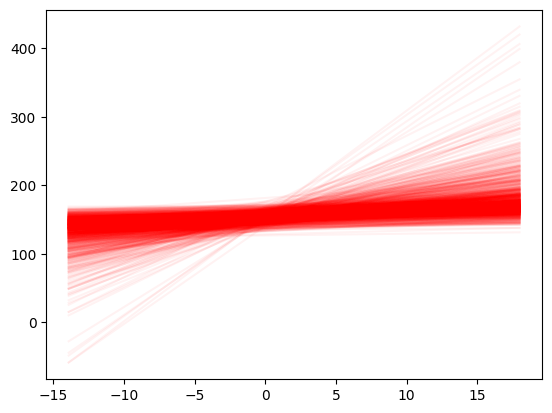

In [53]:
alpha = ppc_df['alpha'].values
beta = ppc_df['beta'].values
h_hat = weight * beta + alpha
plt.plot(extended_domain, h_hat, 'r', alpha=0.05)
plt.show()

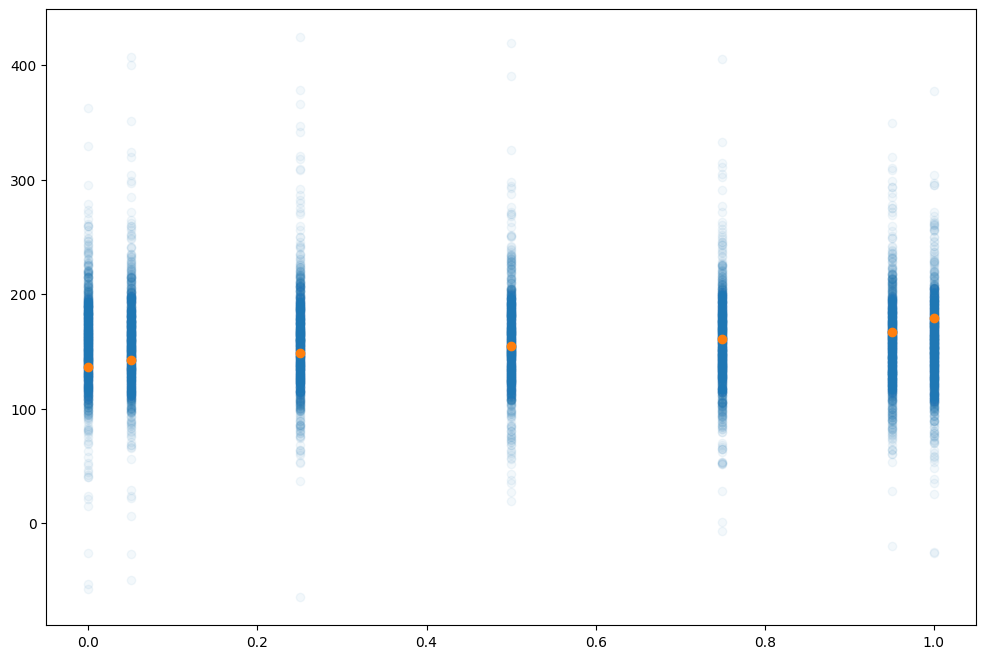

In [54]:
heights = ppc_df.loc[:, 'height[1]':'height[50]'].values
q = [0., 0.05, 0.25, 0.5, 0.75, 0.95, 1.]
quantiles = np.quantile(heights, q, axis=1)
data_quantiles = np.quantile(d.height, q)

plt.figure(figsize=(12, 8))
plt.scatter(q * np.ones((1000, 1)), quantiles, alpha=0.05, label='simulated')
plt.scatter(q, data_quantiles, label='data')

## Task 6. Fitting and evaluating model


In [55]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

21:17:35 - cmdstanpy - INFO - compiling stan file /workspace/height_2_fit.stan to exe file /workspace/height_2_fit
21:17:48 - cmdstanpy - INFO - compiled model executable: /workspace/height_2_fit


In [57]:
print(df.columns)


Index(['chain__', 'iter__', 'draw__', 'lp__', 'accept_stat__', 'stepsize__',
       'treedepth__', 'n_leapfrog__', 'divergent__', 'energy__', 'mu', 'sigma',
       'h_hat'],
      dtype='object')


1. Create ```data_fit``` dictionary containing data from  ```N``` first rows of dataframe


2. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
2. For each value of weight plot mean simulated height along with errorbar of one standard deviation (use ```errorbar``` from matplotlib). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.


## Task 7. Extending the model

1. Center the weight data (substract mean vaule of weight from all values). Test how model works for such data. What is the interpretation of $\alpha$ in such case?
2. Using centered data modify your model with a second power of weight, select prior for its coefficient using prior predictive checks and after fitting check if model is still good.
3. Try to vectorize the model to avoid necessity of a for loop in the ```model``` block. 